#### Objective
In this notebook, we are going to look into the structure of the given features in the training set. Using visualization, we hope to find some clues in our problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random
seed = 1234
np.random.seed(seed)
random.seed(seed)

In [3]:
train = pd.read_json('../Input/train.json')
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [4]:
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train['band_1']])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train['band_2']])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], 
                          X_band_2[:, :, :, np.newaxis],
                          ((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)
target_train = train['is_iceberg']
print('The shape of training set is',X_train.shape)
print('The percentage of positives in trainig set',np.sum(target_train)/len(target_train))

The shape of training set is (1604, 75, 75, 3)
The percentage of positives in trainig set 0.4694513715710723


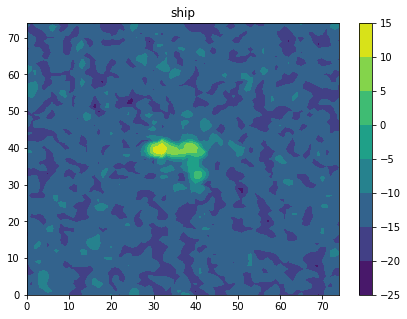

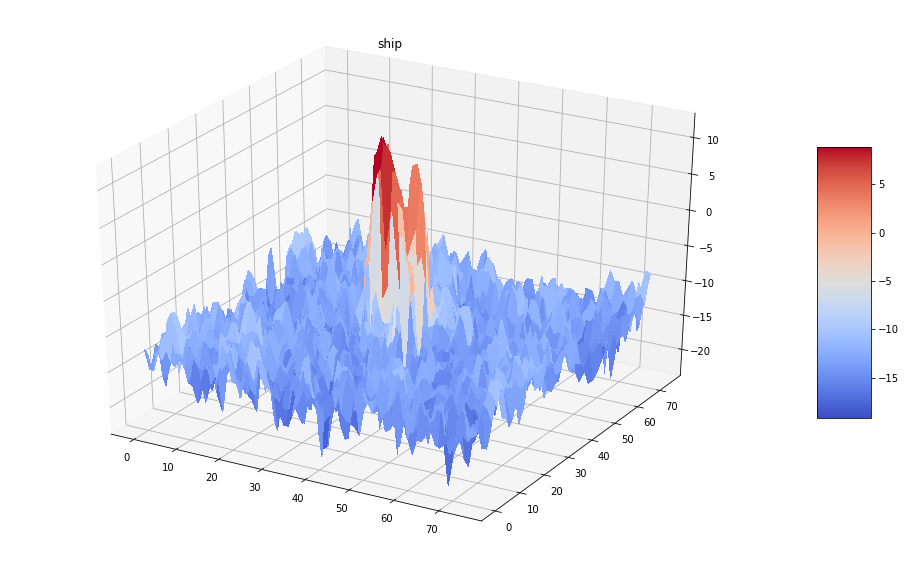

In [39]:
fig = plt.figure(figsize = (7,5))
pixel_size = np.arange(0,75,1)
X,Y = np.meshgrid(pixel_size,pixel_size)
idnum = 1
pixel = np.array(train['band_1'][idnum]).reshape(75,75)
label = train['is_iceberg'][idnum]
plt.contourf(X,Y,pixel)
if label:
    plt.title('iceberg')
else:
    plt.title('ship')
plt.colorbar()
plt.show()
fig = plt.figure(figsize = (17,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, pixel, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
if label:
    plt.title('iceberg')
else:
    plt.title('ship')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

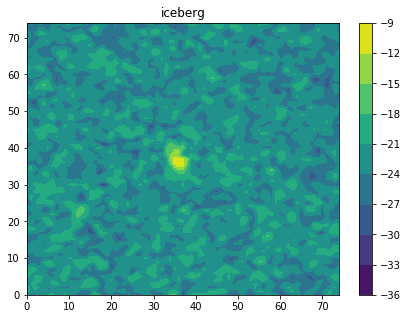

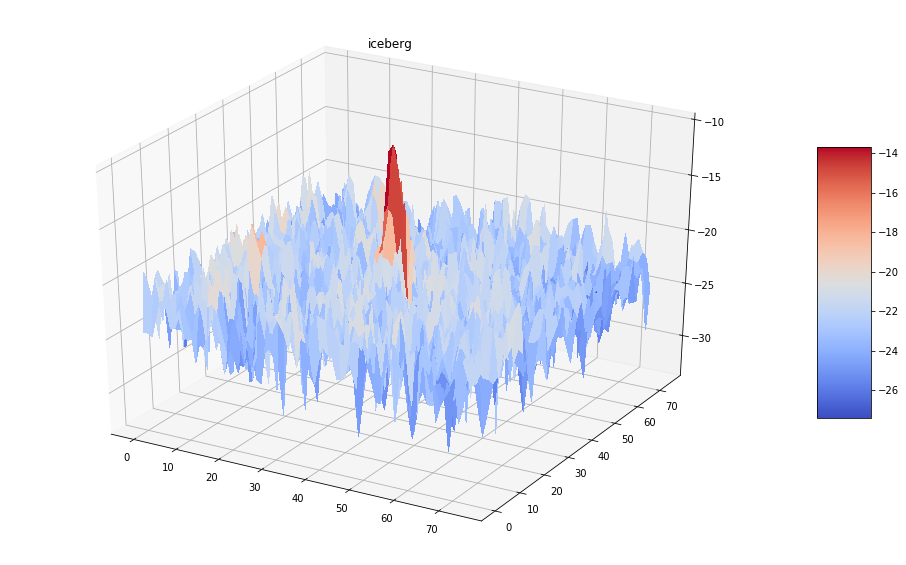

In [36]:
fig = plt.figure(figsize = (7,5))
pixel_size = np.arange(0,75,1)
X,Y = np.meshgrid(pixel_size,pixel_size)
idnum = 2
pixel = np.array(train['band_1'][idnum]).reshape(75,75)
label = train['is_iceberg'][idnum]
plt.contourf(X,Y,pixel)
if label:
    plt.title('iceberg')
else:
    plt.title('ship')
plt.colorbar()
plt.show()
fig = plt.figure(figsize = (17,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, pixel, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
if label:
    plt.title('iceberg')
else:
    plt.title('ship')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
test = pd.read_json('../Input/test.json')
test.head()

In [ ]:
X_band_test_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test['band_1']])
X_band_test_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test['band_2']])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis],
                         X_band_test_2[:, :, :, np.newaxis],
                        ((X_band_test_1+X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)
print('The shape of test set is',X_test.shape)

#### Visualize the signals in 3D plot
We define an function using the plotly module to visualize the data

#### This is a 3D plot of a typical ship
Compared with the iceberg plot, we can see that the ship's figure is elongated and different from the icebergs which are more point-like.
This obvious pattern hints us the utilize the CNN model to build a classifier.

d:\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


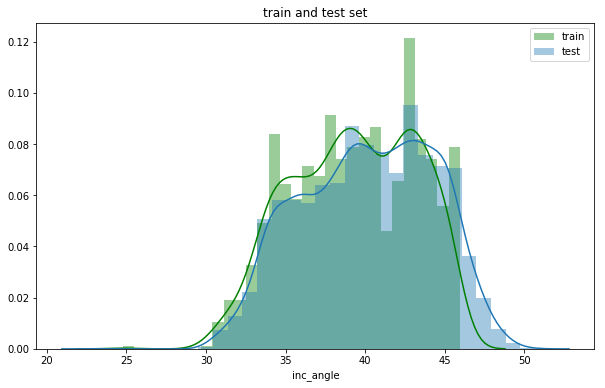

In [89]:
plt.figure(figsize=(10,6))
sns.distplot(train['inc_angle'],label = 'train',color = 'g',bins = 30)
sns.distplot(test['inc_angle'],label = 'test',bins = 30)
plt.legend()
plt.title('train and test set')
plt.show()

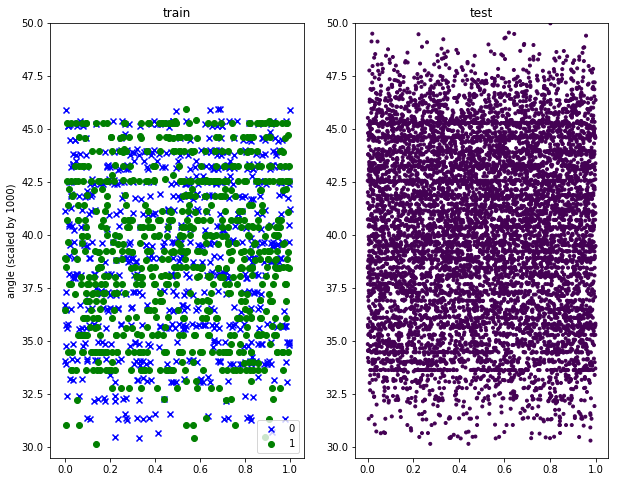

In [118]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(121)
a = plt.scatter(np.random.rand(len(train.loc[train['is_iceberg']==0,'inc_angle'])),
                train.loc[train['is_iceberg']==0,'inc_angle']*1,c = 'b',marker = 'x')
b = plt.scatter(np.random.rand(len(train.loc[train['is_iceberg']==1,'inc_angle'])),
                train.loc[train['is_iceberg']==1,'inc_angle']*1,c = 'g',marker = 'o')
plt.ylim(29.5,50)
plt.ylabel('angle (scaled by 1000)')
plt.title('train')
plt.legend((a,b),('0','1'),loc = 'lower right',scatterpoints = 1 )
fig.add_subplot(122)
plt.scatter(np.random.rand(len(test)),test['inc_angle']*1,c = test['is_iceberg'],marker = '.')
plt.ylim(29.5,50)
plt.title('test')
plt.show()

#### Descriptive Statistics of the angle feature in train and test set

In [130]:
descriptive = pd.concat([train.describe()['inc_angle'],test.describe()['inc_angle']],axis = 1)
descriptive.columns = ['train','test']

In [131]:
descriptive

,train,test
count,1471.000000,8424.000000
mean,39.268707,40.153403
std,3.839744,4.108386
min,24.754600,23.080500
25%,36.106100,36.905200
50%,39.501500,40.375790
75%,42.559100,43.472950
max,45.937500,50.661785
